In [1]:
import os
import glob
import csv

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')

C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_2 = pd.read_csv('../output/csi_data.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()

,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,sub10,...,sub22,sub23,sub24,sub25,sub26,sub27,sub28,sub29,sub30,label
0,21.095023,26.305893,29.068884,30.000000,31.827661,32.000000,33.301652,32.140317,33.015148,33.955854,...,33.241540,33.301652,33.060551,31.144823,30.066593,28.425341,26.476405,22.825424,19.104973,0
1,18.384776,23.769729,25.495098,27.073973,28.017851,28.861739,29.154759,29.410882,29.068884,29.410882,...,30.066593,30.479501,30.265492,28.017851,26.925824,26.000000,23.853721,21.023796,17.464249,0
2,20.615528,26.019224,28.017851,30.083218,31.304952,32.310989,33.105891,32.893768,34.885527,34.205263,...,33.105891,31.953091,31.780497,31.384710,28.792360,28.301943,27.294688,22.627417,20.248457,0
3,20.808652,27.073973,29.068884,30.413813,31.906112,32.984845,32.449961,33.734256,34.409301,34.234486,...,33.421550,33.136083,33.421550,31.256999,30.805844,29.120440,26.400758,23.706539,20.000000,0
4,21.095023,26.305893,29.000000,30.149627,31.622777,32.557641,33.837849,33.541020,33.600595,34.234486,...,33.015148,32.388269,33.015148,31.400637,29.681644,28.460499,26.570661,22.472205,19.723083,0


In [3]:
X_scaled = data_2.iloc[:, 1:]
target = data_2.iloc[:,-1]

In [4]:
# Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X_scaled)
data_scaled
print(data_scaled)

# standardizer = StandardScaler()
# data_scaled = standardizer.fit_transform(data_2)
# data_scaled
# print(data_scaled)


[[0.43271925 0.49498833 0.48492583 ... 0.24133966 0.28960229 0.        ]
 [0.38935199 0.43196543 0.43599803 ... 0.22229053 0.26473141 0.        ]
 [0.42781733 0.47645362 0.48631736 ... 0.23924607 0.30693576 0.        ]
 ...
 [0.42781733 0.4726626  0.46211161 ... 0.28371094 0.34897434 0.        ]
 [0.42418799 0.45980853 0.45682696 ... 0.26956686 0.34566645 0.        ]
 [0.43466512 0.48021577 0.46473218 ... 0.27429466 0.33348648 0.        ]]


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)


In [6]:
x_train, x_test, y_train, y_test = train_test_split( data_scaled, target, test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_test.shape)


X_train.shape:  (838860, 30)
X_test.shape:  (209715, 30)


In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(x_train, y_train)

LogisticRegression()

In [8]:
y_pred = clf.predict(x_test)


In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


No handles with labels found to put in legend.


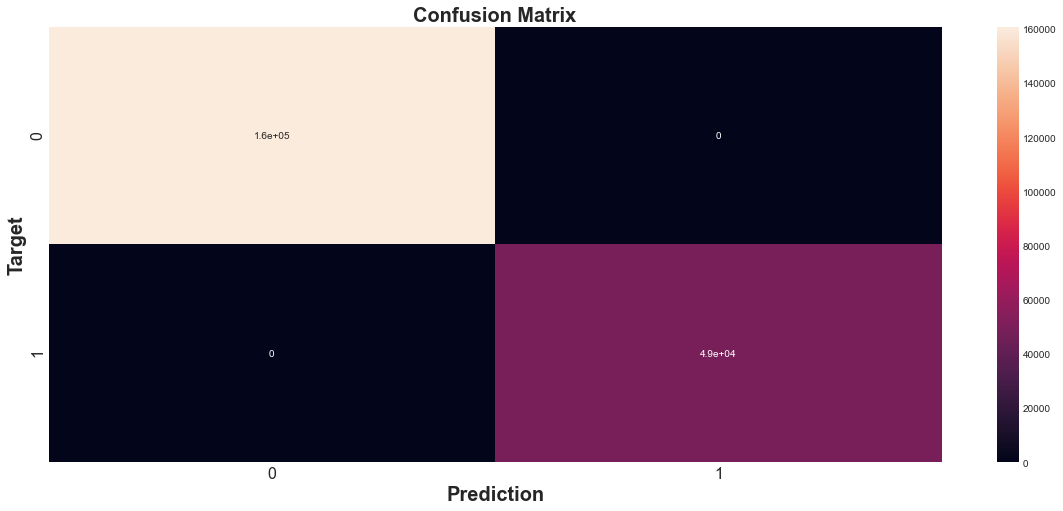

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True )
plt.xlabel('Prediction', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.ylabel('Target', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.title('Confusion Matrix', fontsize=20, fontweight='bold',
          horizontalalignment='center')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)


In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy = (TP+TN) / (TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))


True Positive(TP)  =  49150
False Positive(FP) =  0
True Negative(TN)  =  160565
False Negative(FN) =  0
Accuracy of the binary classification = 1.000


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(C=1.0, class_weight='balanced', dual=False, random_state=1)

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC(C = 0.1, loss='hinge', max_iter=10000, random_state=1)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier( random_state=1)

# Random Forest
models['Random Forest'] = RandomForestClassifier(
    n_estimators=100, random_state=1)

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=1,
                                                    n_neighbors=5,
                                                    p=2,)


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(x_train, y_train)

    # Prediction
    predictions = models[key].predict(x_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)


In [14]:
df_model = pd.DataFrame(index=models.keys(), columns=[
                        'Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,1.0,1.0,1.0
Support Vector Machines,1.0,1.0,1.0
Decision Trees,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0
Naive Bayes,1.0,1.0,1.0
K-Nearest Neighbor,1.0,1.0,1.0


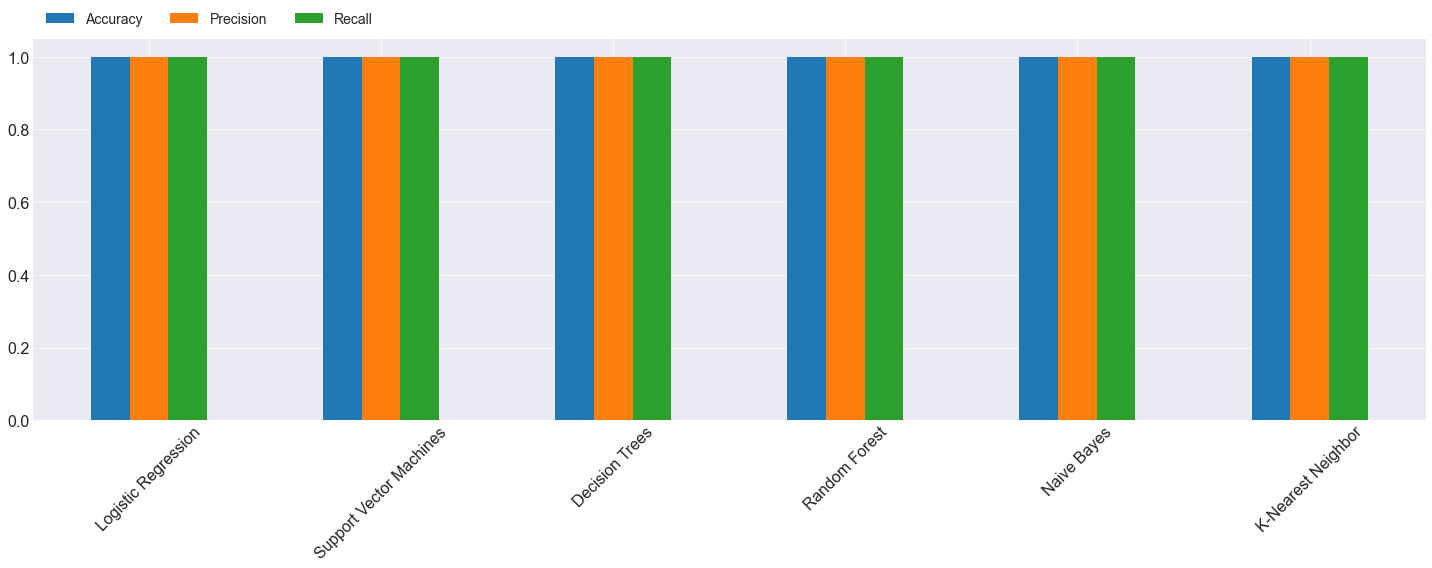

In [15]:
ax = df_model.plot.bar(rot=45)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)
ax.legend(ncol=len(models.keys()), bbox_to_anchor=(
    0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()